# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# api keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude 
from citipy import citipy 

# range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
lat_longs = []

cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

In [3]:
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [4]:
cities_list = list(lat_longs)
print(len(cities))

597


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# weather url 
weather_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
long = []
wind_speed = []
city_name = []

In [6]:
index=1
index+=1
for city in cities:
    city = city
    query_url = weather_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        
        print(f'Processing record {index} of Set 1 : {city}.')
        
    except(KeyError):
        print("City not found. Skipping...")

Processing record 2 of Set 1 : mackay.
Processing record 2 of Set 1 : isangel.
Processing record 2 of Set 1 : busselton.
Processing record 2 of Set 1 : ushuaia.
Processing record 2 of Set 1 : santiago del estero.
Processing record 2 of Set 1 : itarema.
Processing record 2 of Set 1 : barrow.
Processing record 2 of Set 1 : chokurdakh.
Processing record 2 of Set 1 : vestmanna.
Processing record 2 of Set 1 : butaritari.
Processing record 2 of Set 1 : balaipungut.
Processing record 2 of Set 1 : albany.
Processing record 2 of Set 1 : erzin.
Processing record 2 of Set 1 : bari.
Processing record 2 of Set 1 : rio grande.
Processing record 2 of Set 1 : leningradskiy.
Processing record 2 of Set 1 : port elizabeth.
Processing record 2 of Set 1 : san quintin.
Processing record 2 of Set 1 : manzhouli.
Processing record 2 of Set 1 : avera.
Processing record 2 of Set 1 : santa vitoria do palmar.
Processing record 2 of Set 1 : hargeysa.
Processing record 2 of Set 1 : chuy.
Processing record 2 of Set 1

Processing record 2 of Set 1 : ust-maya.
Processing record 2 of Set 1 : mayo.
Processing record 2 of Set 1 : zenzeli.
Processing record 2 of Set 1 : carnarvon.
Processing record 2 of Set 1 : saint-pierre.
City not found. Skipping...
Processing record 2 of Set 1 : zhigansk.
Processing record 2 of Set 1 : tambacounda.
Processing record 2 of Set 1 : saint-philippe.
Processing record 2 of Set 1 : nyurba.
Processing record 2 of Set 1 : harstad.
Processing record 2 of Set 1 : karratha.
Processing record 2 of Set 1 : qurayyat.
Processing record 2 of Set 1 : saskylakh.
Processing record 2 of Set 1 : zaraza.
Processing record 2 of Set 1 : tiksi.
Processing record 2 of Set 1 : villacarrillo.
Processing record 2 of Set 1 : san pedro.
Processing record 2 of Set 1 : filingue.
Processing record 2 of Set 1 : mahebourg.
Processing record 2 of Set 1 : markova.
City not found. Skipping...
Processing record 2 of Set 1 : maneadero.
Processing record 2 of Set 1 : azul.
Processing record 2 of Set 1 : la rio

Processing record 2 of Set 1 : nan.
Processing record 2 of Set 1 : saint-georges.
Processing record 2 of Set 1 : bilma.
Processing record 2 of Set 1 : cody.
Processing record 2 of Set 1 : nador.
Processing record 2 of Set 1 : veshenskaya.
City not found. Skipping...
Processing record 2 of Set 1 : lucea.
City not found. Skipping...
Processing record 2 of Set 1 : bonoua.
Processing record 2 of Set 1 : sao miguel.
Processing record 2 of Set 1 : kaeo.
Processing record 2 of Set 1 : hualmay.
Processing record 2 of Set 1 : sissach.
Processing record 2 of Set 1 : flin flon.
Processing record 2 of Set 1 : pangnirtung.
Processing record 2 of Set 1 : cayenne.
City not found. Skipping...
Processing record 2 of Set 1 : nemuro.
Processing record 2 of Set 1 : koumac.
Processing record 2 of Set 1 : maues.
Processing record 2 of Set 1 : saint-francois.
Processing record 2 of Set 1 : sosua.
Processing record 2 of Set 1 : geraldton.
Processing record 2 of Set 1 : owando.
Processing record 2 of Set 1 : f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_df = pd.DataFrame({"City": city_name,
                        "Cloudiness": cloudiness,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Long": long,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed})

city_df = city_df.rename_axis('City ID')

In [8]:
city_df.to_csv("city_data.csv", encoding="utf-8")

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Mackay,40,AU,1600301117,73,-21.15,149.20,24.44,7.20
1,Isangel,40,VU,1600301117,57,-19.55,169.27,27.00,5.10
2,Busselton,0,AU,1600301117,72,-33.65,115.33,11.11,2.68
3,Ushuaia,40,AR,1600301052,64,-54.80,-68.30,4.00,8.20
4,Santiago del Estero,33,AR,1600301117,36,-27.80,-64.26,21.09,3.69


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

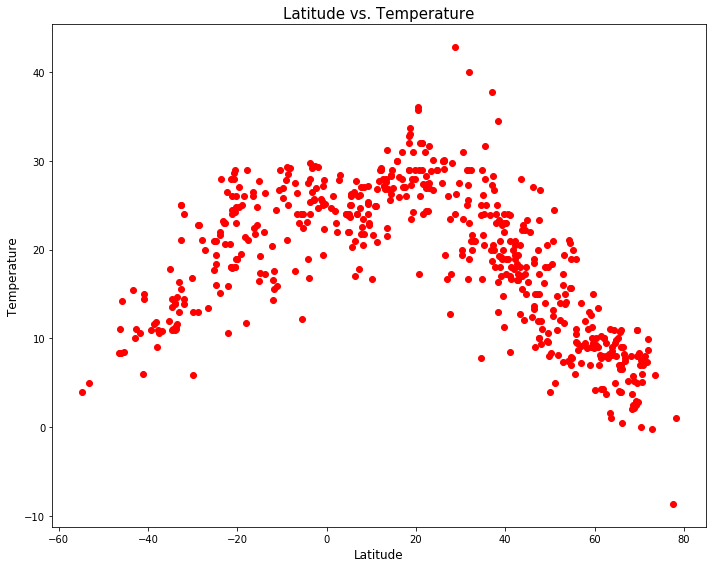

In [102]:
fig1, ax1 = plt.subplots(figsize=(10,8))

temperature = city_df['Max Temp']
latitude = city_df['Lat']

plt.scatter(latitude, temperature, marker="o", color="red")

plt.title("Latitude vs. Temperature", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Temperature", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

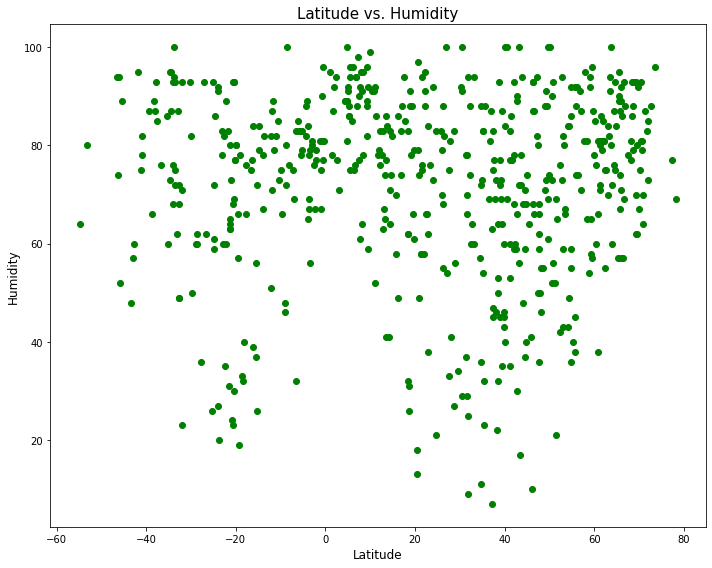

In [103]:
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(city_df['Lat'], city_df['Humidity'], marker="o", color="green")

plt.title("Latitude vs. Humidity", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

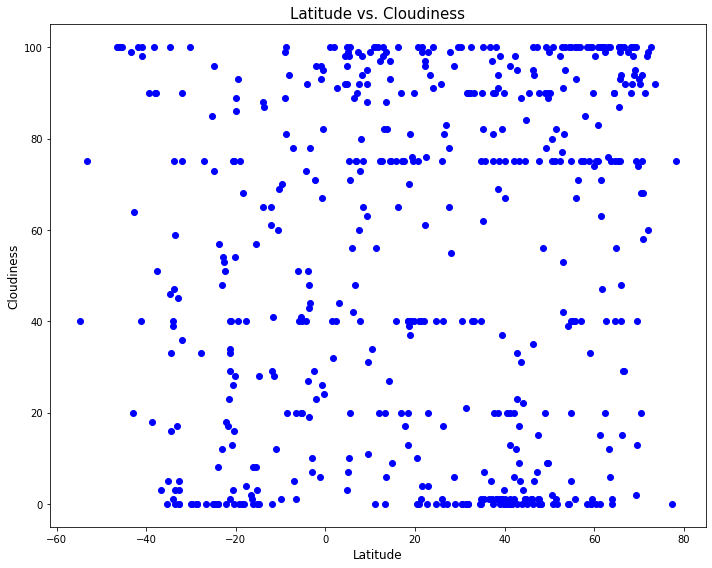

In [104]:
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(city_df['Lat'], city_df['Cloudiness'], marker="o", color="blue")

plt.title("Latitude vs. Cloudiness", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Cloudiness", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

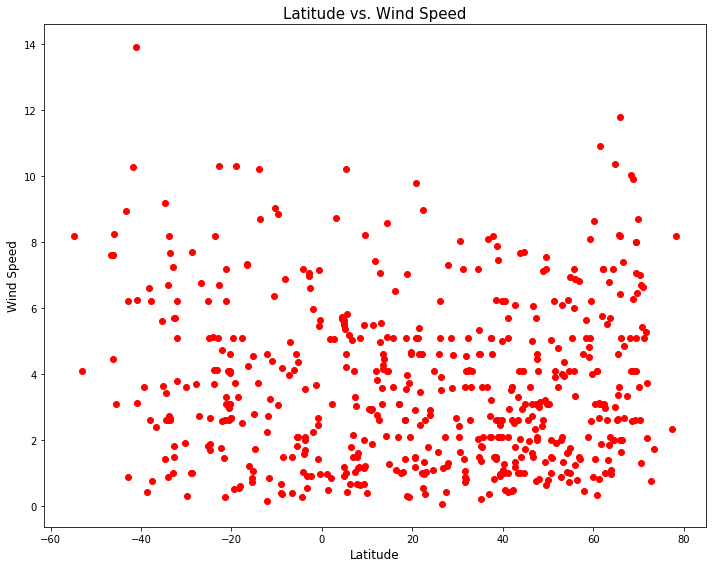

In [105]:
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(city_df['Lat'], city_df['Wind Speed'], marker="o", color="red")

plt.title("Latitude vs. Wind Speed", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Wind Speed", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Wind Speed.png")
plt.show()

## Linear Regression

In [133]:
from scipy.stats import linregress
from sklearn import datasets
import scipy as stats
import statistics

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [134]:
slope, intercept, rvalue, pvalue, stderr = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.09346734075459008
intercept: 20.790310032928737
rvalue: -0.3767774841768126
pvalue: 2.304469922344195e-20
stderr: 0.00971902022563406
line equation: y = -0.09x + 20.79


The r-squared is: 0.1419612725826083


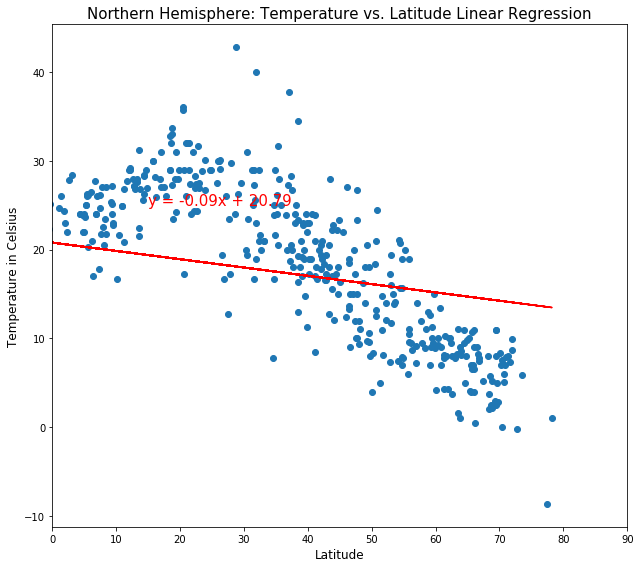

In [135]:
fig1, ax1 = plt.subplots(figsize=(9,8))

temperature = city_df['Max Temp']
latitude = city_df['Lat']

slope, intercept, rvalue, pvalue, stderr = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, temperature)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=15,color="red")

plt.title("Northern Hemisphere: Temperature vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel("Temperature in Celsius", fontsize = 12)
plt.xlim(0,90)

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_Temp_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [136]:
temperature = city_df['Max Temp']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.09346734075459008
intercept: 20.790310032928737
rvalue: -0.3767774841768126
pvalue: 2.304469922344195e-20
stderr: 0.00971902022563406
line equation: y = -0.09x + 20.79


The r-squared is: 0.1419612725826083


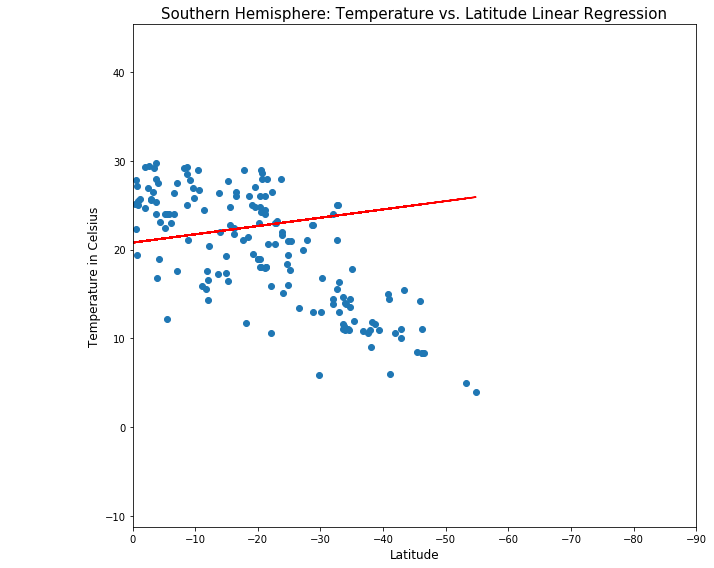

In [137]:
fig1, ax1 = plt.subplots(figsize=(10,8))

temperature = city_df['Max Temp']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, temperature)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

plt.title("Southern Hemisphere: Temperature vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_Temp_vs_Latitude_LinearRegression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [138]:
humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.0010423135021580539
intercept: 71.78175506053127
rvalue: -0.0017660035385377534
pvalue: 0.9667097097479983
stderr: 0.024963197518635384
line equation: y = -0.0x + 71.78


The r-squared is: 3.1187684981278664e-06


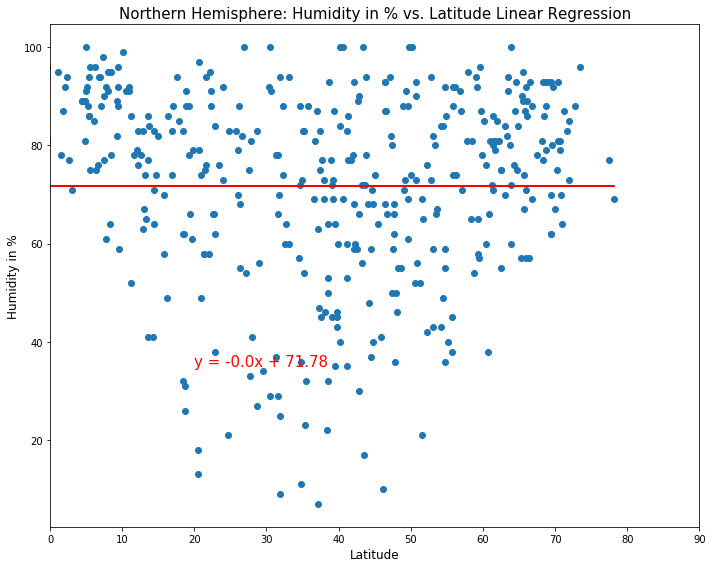

In [139]:
fig1, ax1 = plt.subplots(figsize=(10,8))

humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, humidity_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Northern Hemisphere: Humidity in % vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity in %', fontsize = 12)
plt.xlim(0,90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_Humidity_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [140]:
humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.0010423135021580539
intercept: 71.78175506053127
rvalue: -0.0017660035385377534
pvalue: 0.9667097097479983
stderr: 0.024963197518635384
line equation: y = -0.0x + 71.78


The r-squared is: 3.1187684981278664e-06


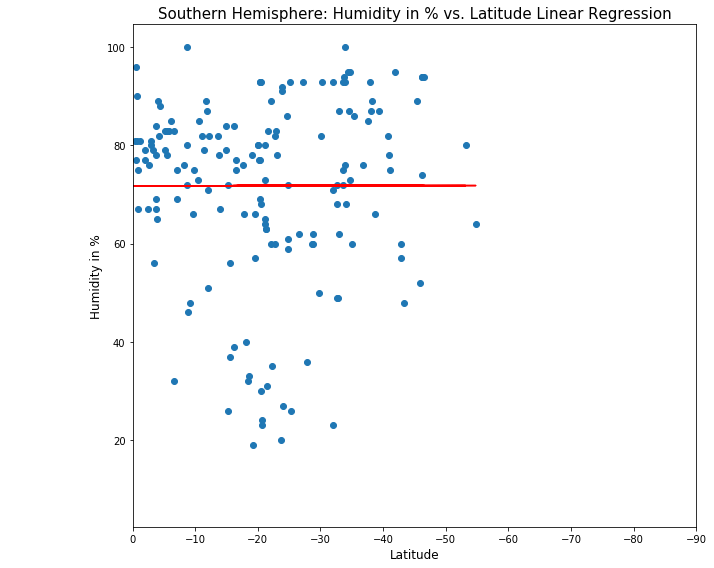

In [141]:
fig1, ax1 = plt.subplots(figsize=(10,8))

humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, humidity_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Southern Hemisphere: Humidity in % vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity in %', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_Hemisphere_vs_Latitude_LinearRegression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [142]:
cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: 0.13970731248770574
intercept: 48.78056222365544
rvalue: 0.12117545352286568
pvalue: 0.004049364022967436
stderr: 0.04840458047094714
line equation: y = 0.14x + 48.78


The r-squared is: 0.014683490536472181


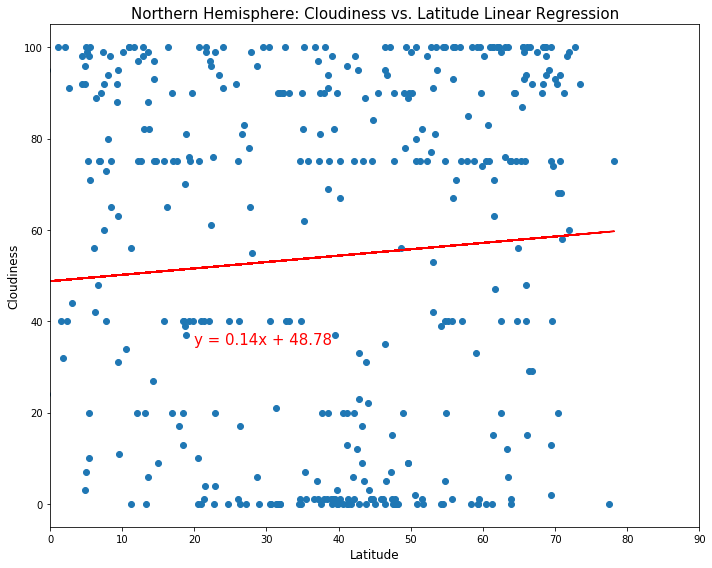

In [143]:
fig1, ax1 = plt.subplots(figsize=(10,8))

cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, cloudiness_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness', fontsize = 12)
plt.xlim(0,90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_Cloudiness_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [144]:
cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: 0.13970731248770574
intercept: 48.78056222365544
rvalue: 0.12117545352286568
pvalue: 0.004049364022967436
stderr: 0.04840458047094714
line equation: y = 0.14x + 48.78


The r-squared is: 0.014683490536472181


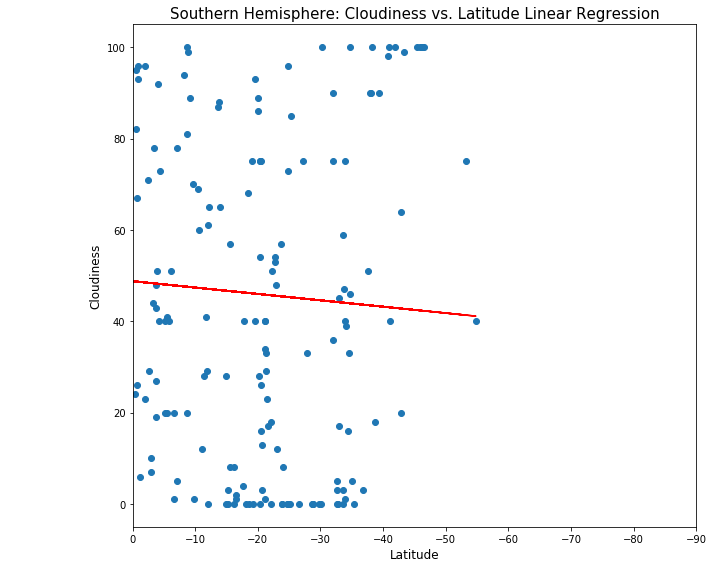

In [145]:
fig1, ax1 = plt.subplots(figsize=(10,8))

cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, cloudiness_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_Cloudiness_vs_Latitude_LinearRegression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [146]:
cloudiness_per = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.002613738490887932
intercept: 3.715235941021708
rvalue: -0.03541563809863248
pvalue: 0.4024652076218861
stderr: 0.0031195261233059476
line equation: y = -0.0x + 3.72


The r-squared is: 0.0012542674219333087


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


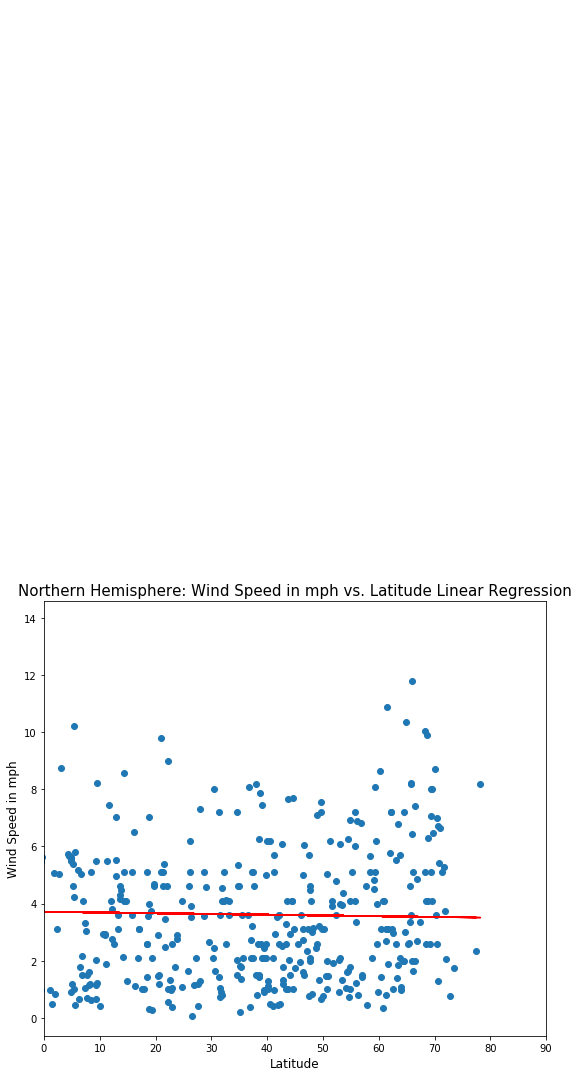

In [147]:
fig1, ax1 = plt.subplots(figsize=(9,8))

wind_speed_mph = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed_mph)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, wind_speed)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Northern Hemisphere: Wind Speed in mph vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed in mph', fontsize = 12)
plt.xlim(0,90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_WindSpeed_mph_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [148]:
cloudiness_per = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.002613738490887932
intercept: 3.715235941021708
rvalue: -0.03541563809863248
pvalue: 0.4024652076218861
stderr: 0.0031195261233059476
line equation: y = -0.0x + 3.72


The r-squared is: 0.0012542674219333087


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


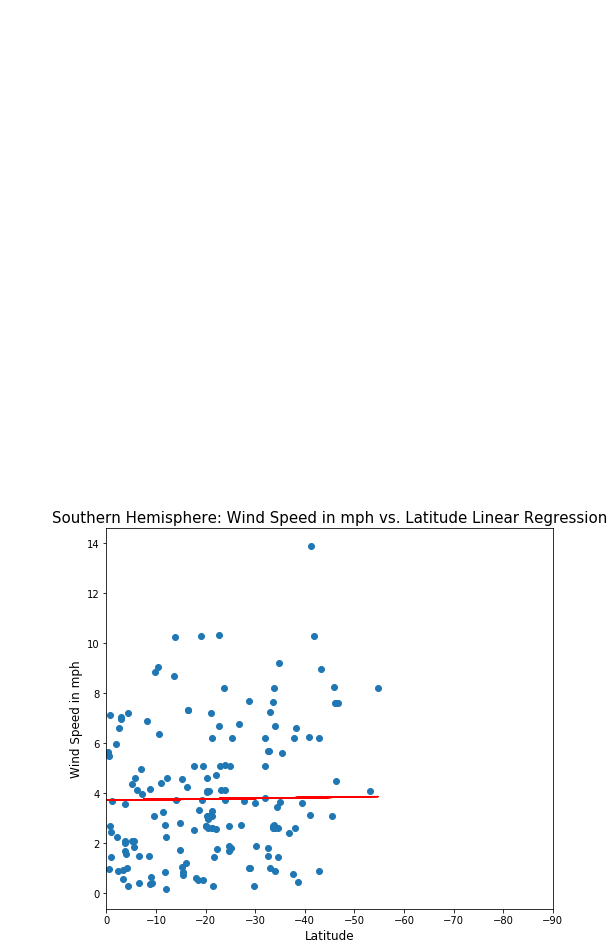

In [149]:
fig1, ax1 = plt.subplots(figsize=(8,7))

wind_speed_mph = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed_mph)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, wind_speed_mph)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Southern Hemisphere: Wind Speed in mph vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed in mph', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_WindSpeed_mph_vs_Latitude_LinearRegression.png")
plt.show()